In [12]:
import sys
import glob
sys.path.append("../")
import CryoAsicAnalysis
import CryoAsicEventViewer
import CryoAsicFile

import matplotlib.pyplot as plt 
import numpy as np
plt.style.use("~/evanstyle.mplstyle")

In [13]:
config = { 
    "baseline":[10, 20],
    "sampling_rate":1, 
    "pulse_threshold": 100, 
    "mv_per_adc": 1800./4096, 
    "key_channel": None, 
    "dead_channels": []
}

In [38]:

def PlotEvent(ca, event, location, channel = []):

    plt.figure()
    for i in range(64):
        if not ca.is_channel_strip(i): continue
        WVFM = ca.get_wave(event,i)
        WVFM -= np.mean(WVFM)
        if i in channel:
            plt.plot(WVFM)
        else: 
            plt.plot(WVFM, alpha = 0.2)
    plt.xlim(location-50,location+50)
    plt.show()


def EventFinder(file_list, thresh):

    config = { 
        "baseline":[10, 20],
        "sampling_rate":1, 
        "pulse_threshold": 100, 
        "mv_per_adc": 1800./4096, 
        "key_channel": None, 
        "dead_channels": []
        }
    
    event_count = 0
    time = 0
    for file in file_list:
        try: ca = CryoAsicAnalysis.CryoAsicAnalysis(file, config)
        except: continue

        for event in range(600):
            if event%100 == 0: print("Analyzing event number {0}".format(event))
            for channel in range(64):
                try: WVFM = ca.get_wave(event, channel)
                except: continue
                if channel == 1: time += len(WVFM)
                WVFM -= np.mean(WVFM)
                if np.any(WVFM >= thresh):
                    locations = np.where(WVFM >= thresh)[0]
                    for datapoint in locations:
                        if (datapoint > 1000) and (datapoint < 1020): continue
                        if (WVFM[datapoint-1] > thresh/1.5):
                            event_count += 1
                            PlotEvent(ca, event, datapoint, [channel])
                            break
    print('Event rate is {0} Hz +/- {1} Hz'.format(event_count/(time*1e-6), np.sqrt(event_count)/(time*1e-6)))



loading hdf5 file /media/asicdaq/02a27d49-74c8-4298-88e1-d96ac453d3dd/cryoasic/LXe_Run1/Test_Gamma_Source_7_11_24/Gamma_Test_Cs137_5kV_7_11_24_initcryo_4_6g_12pt_1000us_file10.h5
Done loading
Analyzing event number 0
Analyzing event number 100


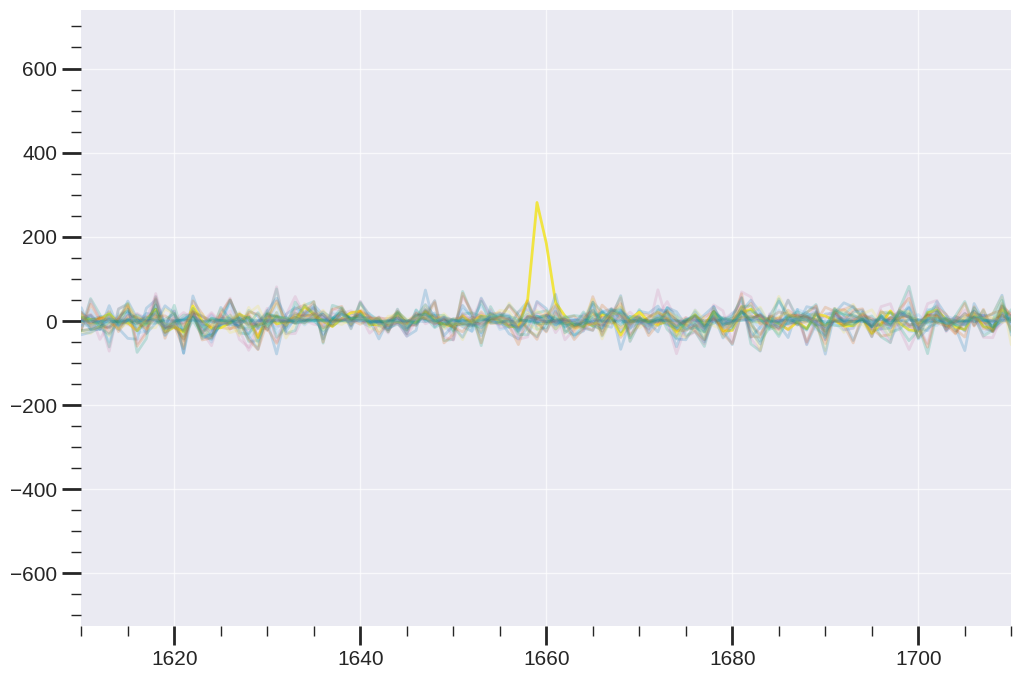

Analyzing event number 200
Analyzing event number 300
Analyzing event number 400
Analyzing event number 500


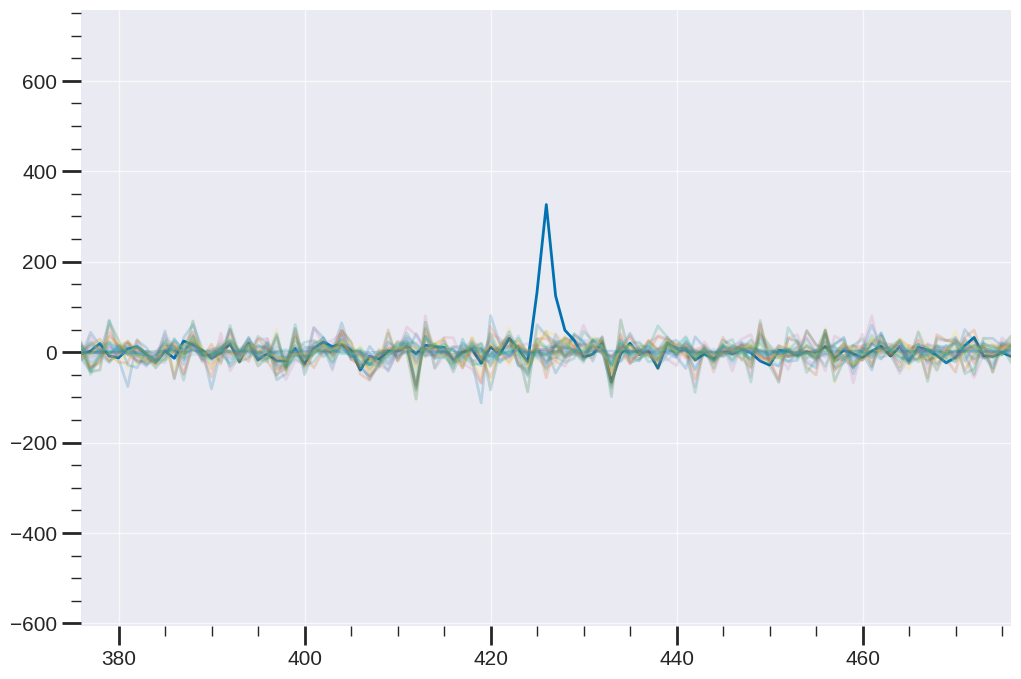

loading hdf5 file /media/asicdaq/02a27d49-74c8-4298-88e1-d96ac453d3dd/cryoasic/LXe_Run1/Test_Gamma_Source_7_11_24/Gamma_Test_Cs137_5kV_7_11_24_initcryo_4_6g_12pt_1000us_file8.h5
Done loading
Analyzing event number 0
Analyzing event number 100
Analyzing event number 200
Analyzing event number 300
Analyzing event number 400
Analyzing event number 500
loading hdf5 file /media/asicdaq/02a27d49-74c8-4298-88e1-d96ac453d3dd/cryoasic/LXe_Run1/Test_Gamma_Source_7_11_24/Gamma_Test_Cs137_5kV_7_11_24_initcryo_4_6g_12pt_1000us_file9.h5
Done loading
Analyzing event number 0
Analyzing event number 100
Analyzing event number 200
Analyzing event number 300
Analyzing event number 400


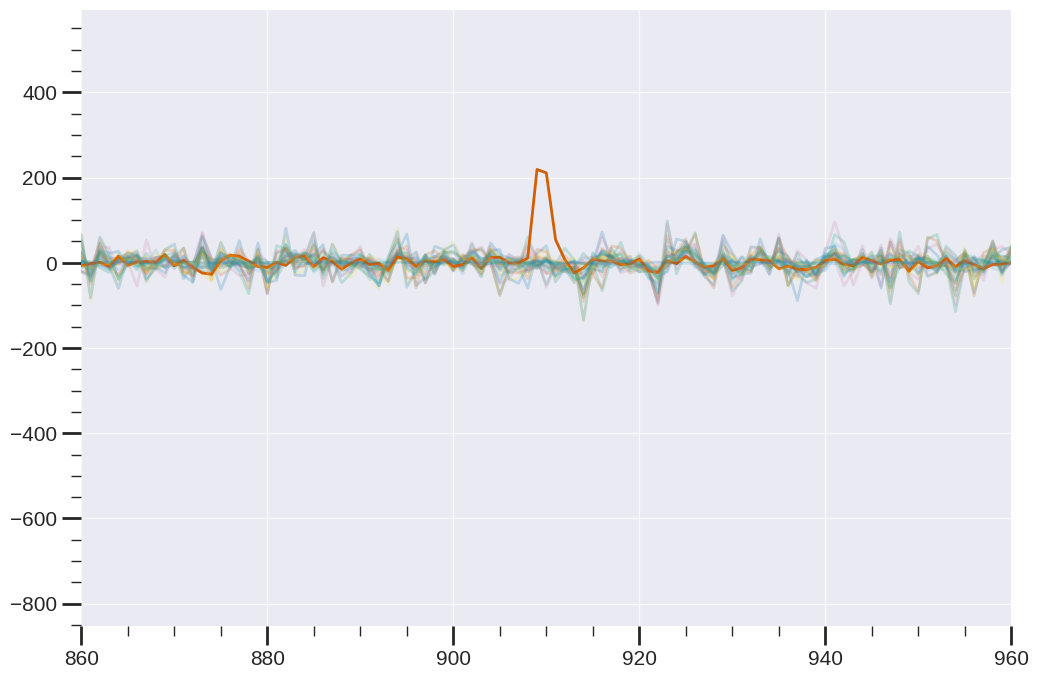

Analyzing event number 500
loading hdf5 file /media/asicdaq/02a27d49-74c8-4298-88e1-d96ac453d3dd/cryoasic/LXe_Run1/Test_Gamma_Source_7_11_24/Gamma_Test_Cs137_5kV_7_11_24_initcryo_4_6g_12pt_1000us_file6.h5
Done loading
Analyzing event number 0
Analyzing event number 100
Analyzing event number 200
Analyzing event number 300
Analyzing event number 400
Analyzing event number 500
loading hdf5 file /media/asicdaq/02a27d49-74c8-4298-88e1-d96ac453d3dd/cryoasic/LXe_Run1/Test_Gamma_Source_7_11_24/Gamma_Test_Cs137_5kV_7_11_24_initcryo_4_6g_12pt_1000us_file2.h5
Done loading
Analyzing event number 0
Analyzing event number 100
Analyzing event number 200
Analyzing event number 300
Analyzing event number 400


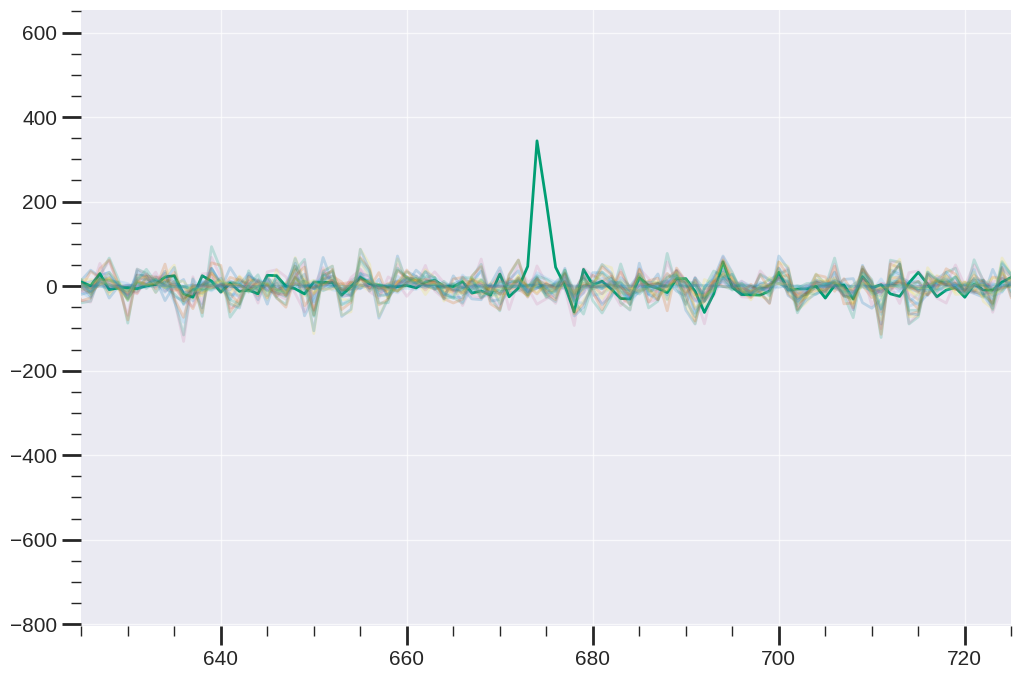

Analyzing event number 500
loading hdf5 file /media/asicdaq/02a27d49-74c8-4298-88e1-d96ac453d3dd/cryoasic/LXe_Run1/Test_Gamma_Source_7_11_24/Gamma_Test_Cs137_5kV_7_11_24_initcryo_4_6g_12pt_1000us_file1.h5
Done loading
Analyzing event number 0
Analyzing event number 100
Analyzing event number 200
Analyzing event number 300
Analyzing event number 400
Analyzing event number 500
loading hdf5 file /media/asicdaq/02a27d49-74c8-4298-88e1-d96ac453d3dd/cryoasic/LXe_Run1/Test_Gamma_Source_7_11_24/Gamma_Test_Cs137_5kV_7_11_24_initcryo_4_6g_12pt_1000us_file7.h5
Done loading
Analyzing event number 0


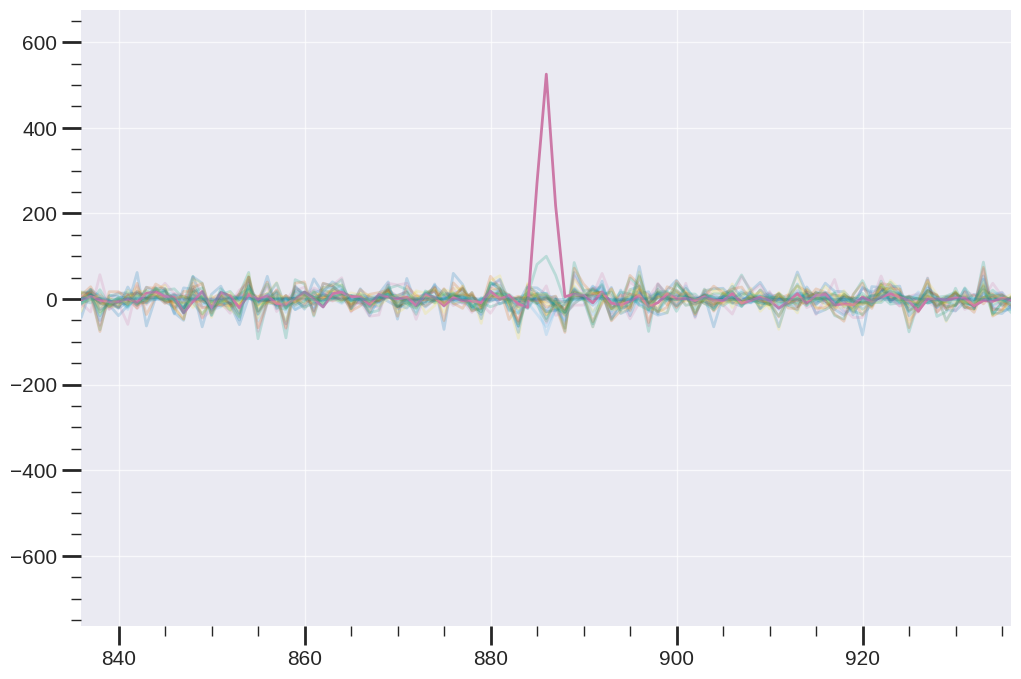

Analyzing event number 100
Analyzing event number 200
Analyzing event number 300
Analyzing event number 400
Analyzing event number 500


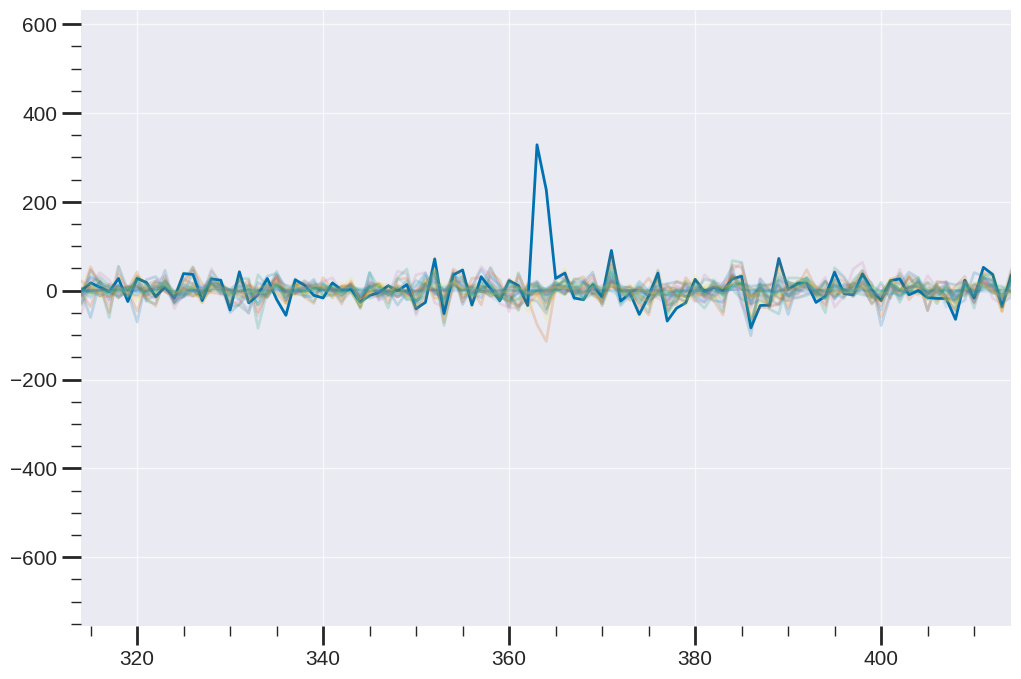

loading hdf5 file /media/asicdaq/02a27d49-74c8-4298-88e1-d96ac453d3dd/cryoasic/LXe_Run1/Test_Gamma_Source_7_11_24/Gamma_Test_Cs137_5kV_7_11_24_initcryo_4_6g_12pt_1000us_file3.h5
Done loading
Analyzing event number 0
Analyzing event number 100
Analyzing event number 200
Analyzing event number 300
Analyzing event number 400
Analyzing event number 500
loading hdf5 file /media/asicdaq/02a27d49-74c8-4298-88e1-d96ac453d3dd/cryoasic/LXe_Run1/Test_Gamma_Source_7_11_24/Gamma_Test_Cs137_5kV_7_11_24_initcryo_4_6g_12pt_1000us_file4.h5
Done loading
Analyzing event number 0
Analyzing event number 100


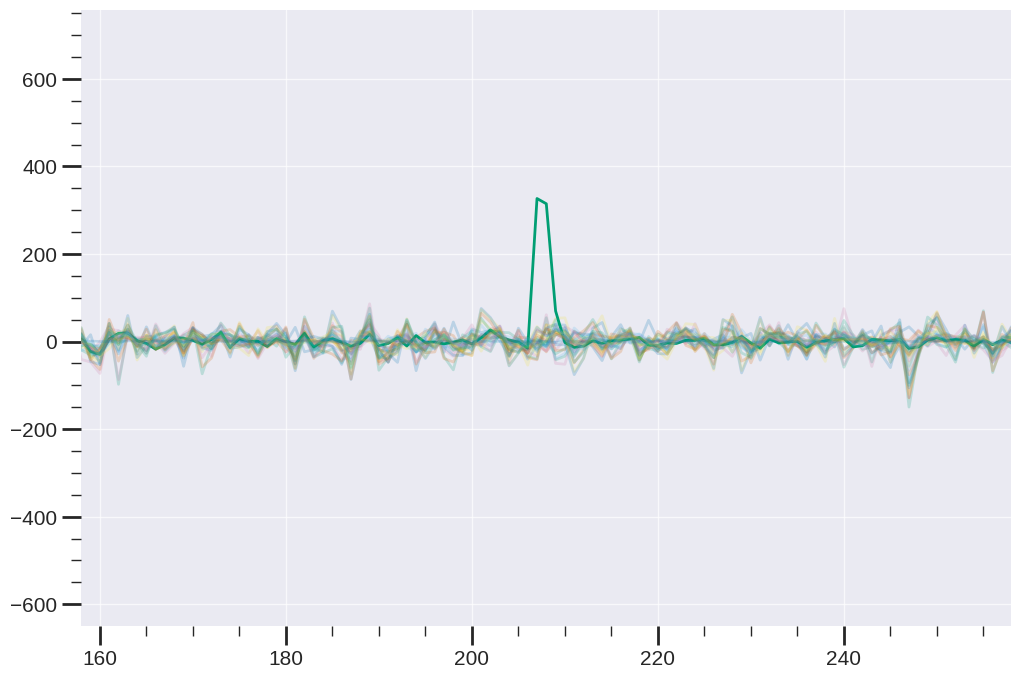

Analyzing event number 200
Analyzing event number 300
Analyzing event number 400
Analyzing event number 500
loading hdf5 file /media/asicdaq/02a27d49-74c8-4298-88e1-d96ac453d3dd/cryoasic/LXe_Run1/Test_Gamma_Source_7_11_24/Gamma_Test_Cs137_5kV_7_11_24_initcryo_4_6g_12pt_1000us_file5.h5
Done loading
Analyzing event number 0
Analyzing event number 100
Analyzing event number 200
Analyzing event number 300
Analyzing event number 400
Analyzing event number 500
Event rate is 0.5833333333333334 Hz +/- 0.22047927592204922 Hz


In [42]:
file_list = glob.glob("/media/asicdaq/02a27d49-74c8-4298-88e1-d96ac453d3dd/cryoasic/LXe_Run1/Test_Gamma_Source_7_11_24/*Cs*.h5")
EventFinder(file_list, 125)